# **クラスタリング演習**

 **１．課題把握とゴールの設定**

**課題**

・カリフォルニアで飲食店の新ビジネスを立ち上げたい

・カリフォルニアの住宅データがあるので、それをもとに何かヒントを得たい

**ゴール**

・カリフォルニアの住宅データをクラスタリングして、飲食店ビジネスに役立ちそうな知見を見いだす

**２．必要なライブラリのインポート**

In [28]:
import pandas as pd
import seaborn as sns

In [29]:
!pip install japanize-matplotlib
import japanize_matplotlib

**３．データセットの準備**

In [30]:
df = pd.read_csv('/content/california_housing_cleansing.csv')
df.head()

,Unnamed: 0,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人
0,0,8.3252,41.0,322.0,37.88,-122.23,4.526,2.732919,0.400621
1,1,8.3014,21.0,2401.0,37.86,-122.22,3.585,2.956685,0.460641
2,8,2.0804,42.0,1206.0,37.84,-122.26,2.267,2.118574,0.551410
3,15,2.1250,50.0,697.0,37.85,-122.26,1.400,1.606887,0.406026
4,18,1.9911,50.0,990.0,37.84,-122.26,1.587,2.261616,0.459596


In [31]:
df = df.drop(columns = ['Unnamed: 0'])
df.head()

,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人
0,8.3252,41.0,322.0,37.88,-122.23,4.526,2.732919,0.400621
1,8.3014,21.0,2401.0,37.86,-122.22,3.585,2.956685,0.460641
2,2.0804,42.0,1206.0,37.84,-122.26,2.267,2.118574,0.551410
3,2.1250,50.0,697.0,37.85,-122.26,1.400,1.606887,0.406026
4,1.9911,50.0,990.0,37.84,-122.26,1.587,2.261616,0.459596


In [32]:
df.shape

(18572, 8)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
X = df.to_numpy()
scaler.fit(X)

StandardScaler()

In [35]:
X_scaled = scaler.transform(X)
X_scaled

array([[ 2.95027401,  1.22609842, -0.98751408, ...,  2.745577  ,
         0.7095734 ,  0.01067288],
       [ 2.9351148 , -0.5234521 ,  0.80023789, ...,  1.76319575,
         0.90892516,  0.25820709],
       [-1.02729904,  1.31357595, -0.22735403, ...,  0.38723561,
         0.16225546,  0.6325512 ],
       ...,
       [-1.26959164, -0.87336221, -0.39847603, ..., -1.01586791,
         0.26894728,  0.344762  ],
       [-1.163095  , -0.78588468, -0.62721197, ..., -1.09521007,
         0.51108372,  0.63480794],
       [-0.83099363, -0.96083973, -0.0717104 , ..., -1.04614321,
         0.06368403,  0.19008646]])

**４．データセットのクラスタリング**

In [36]:
from sklearn.cluster import KMeans

In [37]:
#クラスター数を８に指定
model = KMeans(n_clusters=8, random_state=0)

In [38]:
model.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(random_state=0)

In [39]:
model.labels_

array([6, 6, 3, ..., 3, 3, 3], dtype=int32)

In [40]:
df['クラスター'] = model.labels_
df.head()

,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人,クラスター
0,8.3252,41.0,322.0,37.88,-122.23,4.526,2.732919,0.400621,6
1,8.3014,21.0,2401.0,37.86,-122.22,3.585,2.956685,0.460641,6
2,2.0804,42.0,1206.0,37.84,-122.26,2.267,2.118574,0.551410,3
3,2.1250,50.0,697.0,37.85,-122.26,1.400,1.606887,0.406026,3
4,1.9911,50.0,990.0,37.84,-122.26,1.587,2.261616,0.459596,3


# **クラスタリングに対する考察**

**クラスター別のデータ数の確認**

<Axes: xlabel='クラスター', ylabel='count'>

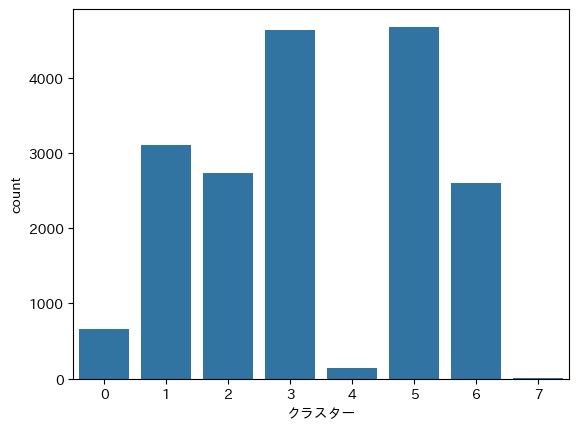

In [41]:
sns.countplot(x='クラスター', data=df)

**クラスター別の平均値の比較**

In [42]:
cluster_max = df.groupby('クラスター').max()
cluster_max

,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人
クラスター,,,,,,,,
0,10.2264,46.0,35682.0,40.55,-116.06,4.912,3.232827,0.819393
1,6.6369,34.0,4122.0,37.40,-114.55,4.000,4.929863,1.318310
2,13.1477,51.0,4160.0,36.85,-115.55,5.000,5.333486,1.158798
3,6.1183,51.0,4367.0,41.95,-118.31,3.500,5.062500,1.255319
4,15.0001,44.0,4176.0,41.50,-114.31,4.200,16.838942,3.264423
5,5.5787,51.0,4496.0,37.36,-114.57,4.107,3.925926,0.878641
6,15.0001,51.0,4552.0,40.94,-118.96,5.000,5.417012,0.985673
7,4.9750,34.0,265.0,40.27,-114.49,4.375,55.222222,14.194444


所得の平均値が最も低いのは、クラスター７(≒2.66)であるが、データ数が少ない。

次に所得の平均値が低いのはクラスター３(≒2.78)であり、データ数も揃っているようにみえる。

さらに住宅価格は≒1.19と最も低い。

クラスター３は所得が低いと考えて深堀してみる。

**各クラスターと緯度経度の関係の確認**

<Axes: xlabel='経度', ylabel='緯度'>

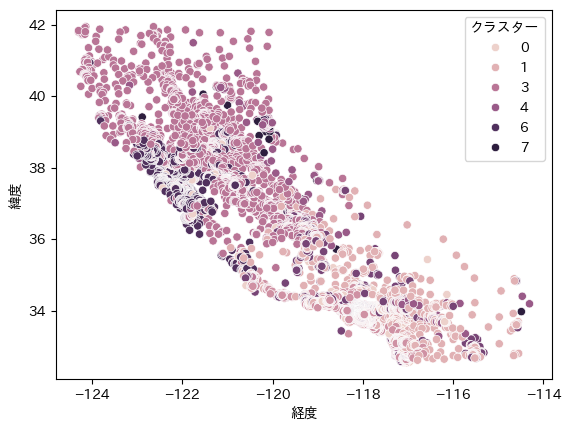

In [43]:
sns.scatterplot(x='経度', y='緯度', hue='クラスター', data=df)

**特定のクラスターに的を絞った深堀**

<Axes: xlabel='経度', ylabel='緯度'>

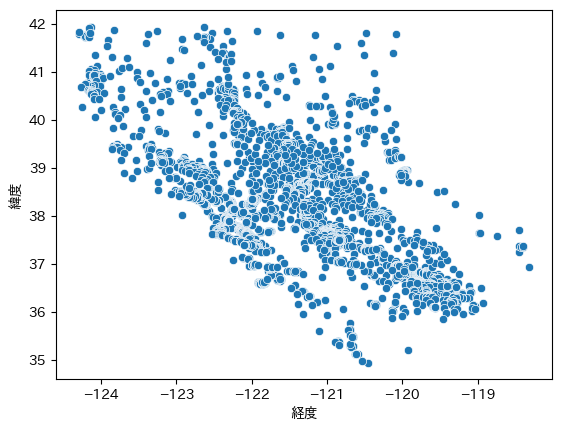

In [44]:
#所得が低めと思われるクラスター３に絞って、緯度と経度でマッピングする。
df_cluster3 = df.query('クラスター == 3')
sns.scatterplot(x='経度', y='緯度', data=df_cluster3)

なんかいっぱいある。


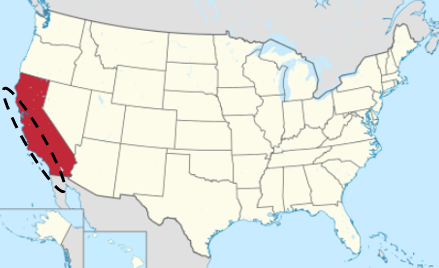

In [45]:
from PIL import Image
california_map = Image.open('/content/california_map.png')
california_map

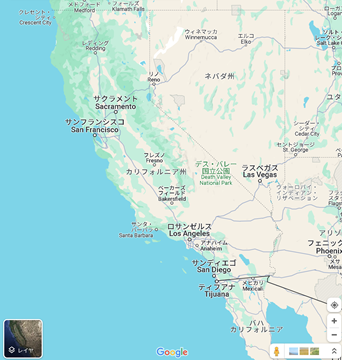

In [46]:
california_google = Image.open('/content/california_google.png')
california_google

クラスター３はカリフォルニア全体の経度左半分にあるようだ。

カリフォルニア全体の地域人口をグラフ化する。

<Axes: xlabel='地域人口', ylabel='Count'>

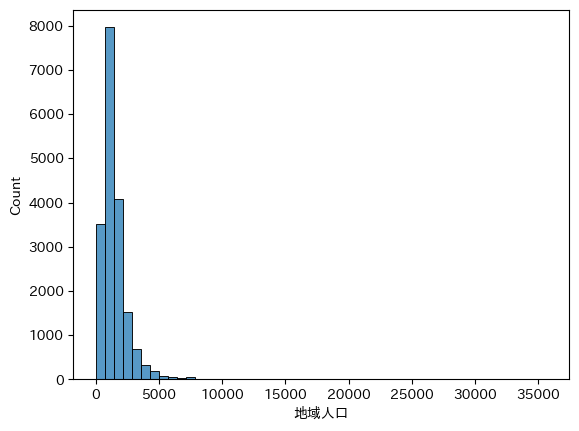

In [47]:
sns.histplot(x='地域人口', data=df, bins=50)

In [48]:
#カリフォルニアの5000名を超えるデータが点在しているようだ。
#クラスター３を緯度と経度でマッピングしてみる。

<Axes: >

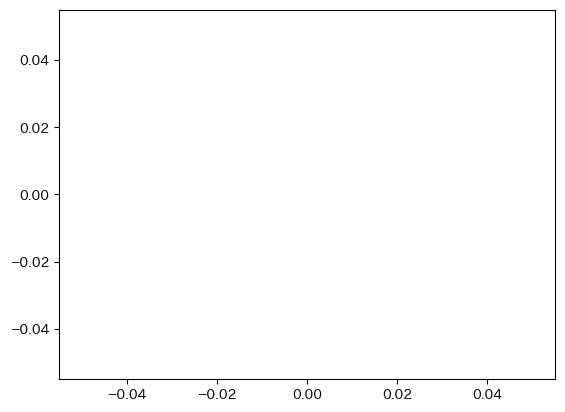

In [49]:
sns.scatterplot(x='経度', y='緯度', data=df_cluster3.query('地域人口 > 5000'))

なくなってしまった。

ので3000名を超えるクラスター３をマッピングしてみる。

<Axes: xlabel='経度', ylabel='緯度'>

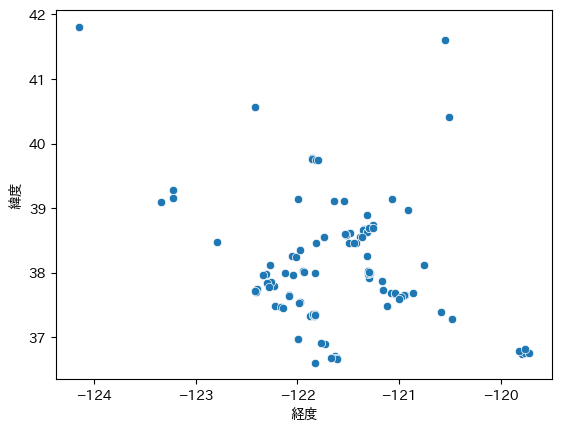

In [50]:
sns.scatterplot(x='経度', y='緯度', data=df_cluster3.query('地域人口 > 3000'))

3つほどのエリアにポイントが集中しているように見える。

経度-122°緯度38°,経度-121°緯度39°,経度-121°緯度38度

地図上で見るとサンフランシスコに相当する。

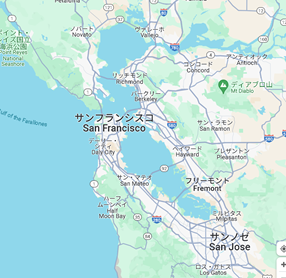

In [51]:
sanfrancisco_google = Image.open('/content/sanfrancisco_google.png')
sanfrancisco_google

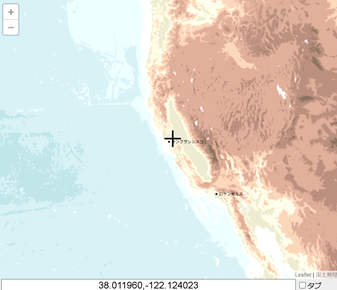

In [85]:
sanfrancisco_keidoido = Image.open('/content/sanfrancisco_keidoido.png')
sanfrancisco_keidoido

サンフランシスコって結構な都市のイメージだけど所得の平均が低いってどういうことなのか。

なんかおかしいので見直してみるとこのcalifornia_housing_cleansingの元のデータセットはthis dataset was drived from the 1990 u.s.なので1990年のもの。
wikipediaによると1989年にロマ・プリータ地震がおきて再建に転じている時期にあるデータとみれる。

だから所得や住宅価格が低く出たのか……？

**それぞれのクラスターの特徴を見てみる。**

# **クラスター０**

<Axes: xlabel='地域人口', ylabel='Count'>

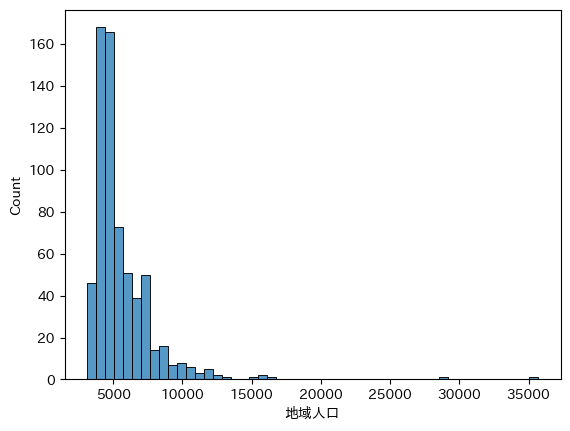

In [88]:
sns.histplot(x='地域人口', data=df_cluster0, bins=50)

<Axes: xlabel='経度', ylabel='緯度'>

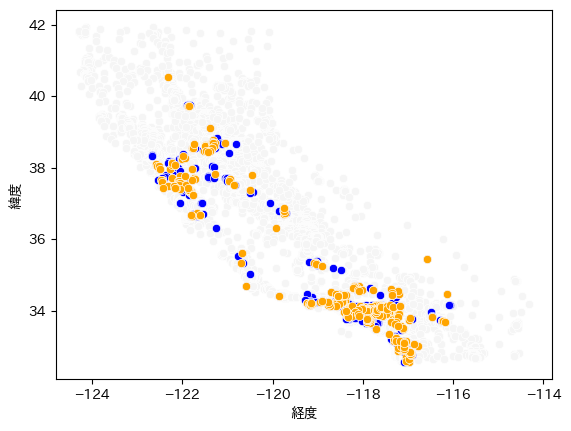

In [87]:
df_cluster0 = df.query('クラスター == 0')
sns.scatterplot(x='経度', y='緯度', data=df, color="whitesmoke")
sns.scatterplot(x='経度', y='緯度', data=df_cluster0.query('地域人口 <= 3000'), color="skyblue")
sns.scatterplot(x='経度', y='緯度', data=df_cluster0.query('地域人口 > 3000'), color="blue")
sns.scatterplot(x='経度', y='緯度', data=df_cluster0.query('地域人口 > 5000'), color="orange")

地域人口は2000名を超えており、かつカリフォルニアの中央から全体に点在しているように見える。

<Axes: xlabel='地域人口', ylabel='Count'>

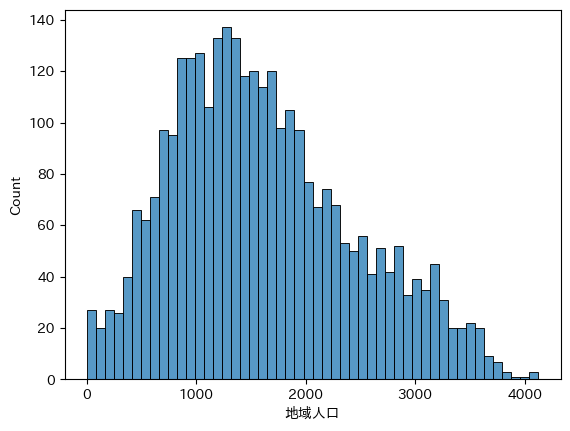

In [90]:
sns.histplot(x='地域人口', data=df_cluster1, bins=50)

<Axes: xlabel='経度', ylabel='緯度'>

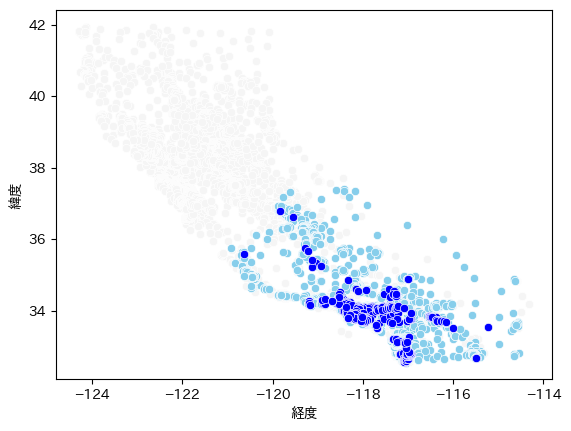

In [89]:
df_cluster1 = df.query('クラスター == 1')
sns.scatterplot(x='経度', y='緯度', data=df, color="whitesmoke")
sns.scatterplot(x='経度', y='緯度', data=df_cluster1.query('地域人口 <= 3000'), color="skyblue")
sns.scatterplot(x='経度', y='緯度', data=df_cluster1.query('地域人口 > 3000'), color="blue")
sns.scatterplot(x='経度', y='緯度', data=df_cluster1.query('地域人口 > 5000'), color="orange")

地位時均衡は5000名以下で、ボリュームゾーンは1500名。カリフォルニアの下の方に集中する。

<Axes: xlabel='地域人口', ylabel='Count'>

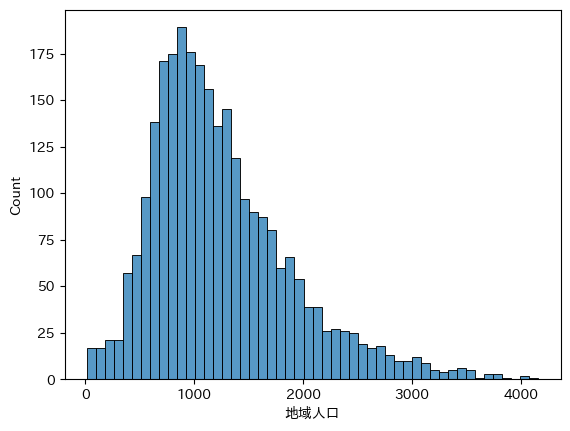

In [92]:
sns.histplot(x='地域人口', data=df_cluster2, bins=50)

<Axes: xlabel='経度', ylabel='緯度'>

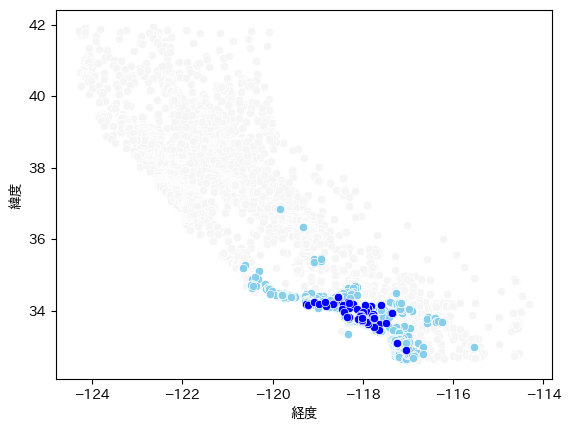

In [91]:
df_cluster2 = df.query('クラスター == 2')
sns.scatterplot(x='経度', y='緯度', data=df, color="whitesmoke")
sns.scatterplot(x='経度', y='緯度', data=df_cluster2.query('地域人口 <= 3000'), color="skyblue")
sns.scatterplot(x='経度', y='緯度', data=df_cluster2.query('地域人口 > 3000'), color="blue")
sns.scatterplot(x='経度', y='緯度', data=df_cluster2.query('地域人口 > 5000'), color="orange")

地域人口は5000名以下でボリュームゾーンは1000名。カリフォルニアの下の方の沿岸部に集中する。

<Axes: xlabel='地域人口', ylabel='Count'>

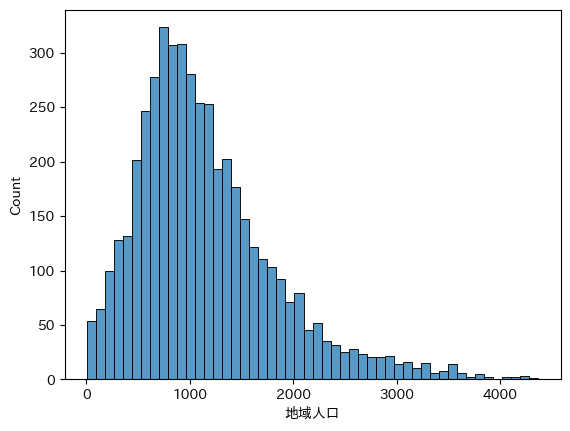

In [94]:
sns.histplot(x='地域人口', data=df_cluster3, bins=50)

<Axes: xlabel='経度', ylabel='緯度'>

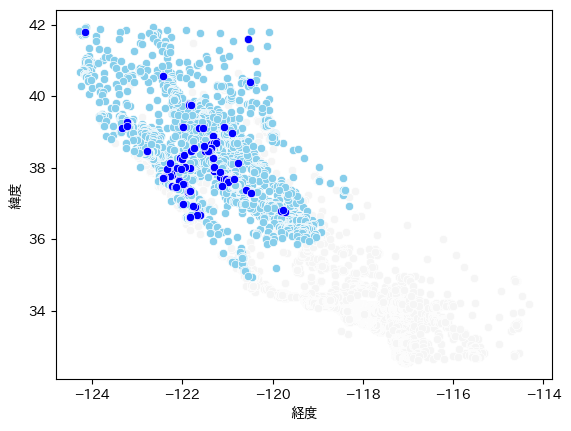

In [93]:
df_cluster3 = df.query('クラスター == 3')
sns.scatterplot(x='経度', y='緯度', data=df, color="whitesmoke")
sns.scatterplot(x='経度', y='緯度', data=df_cluster3.query('地域人口 <= 3000'), color="skyblue")
sns.scatterplot(x='経度', y='緯度', data=df_cluster3.query('地域人口 > 3000'), color="blue")
sns.scatterplot(x='経度', y='緯度', data=df_cluster3.query('地域人口 > 5000'), color="orange")

地域人口は5000名以下で、ボリュームゾーンは1000名。カリフォルニアの上の方に集中する。

やはりサンフランシスコ周辺に人口が多い印象。

<Axes: xlabel='地域人口', ylabel='Count'>

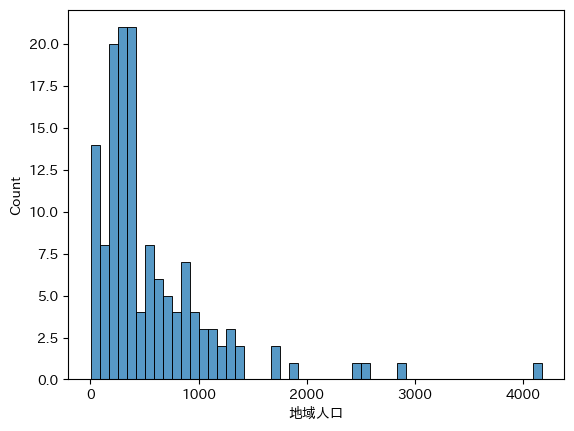

In [96]:
sns.histplot(x='地域人口', data=df_cluster4, bins=50)

<Axes: xlabel='経度', ylabel='緯度'>

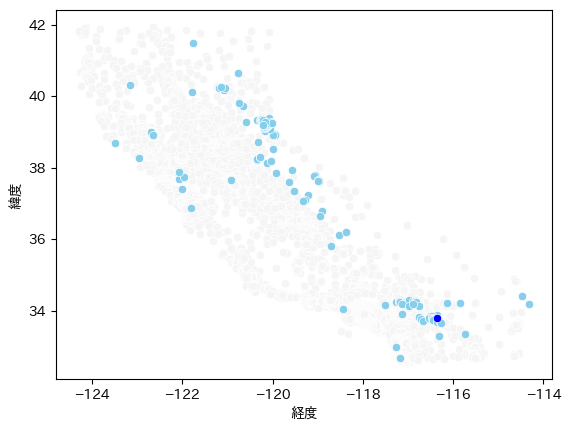

In [95]:
df_cluster4 = df.query('クラスター == 4')
sns.scatterplot(x='経度', y='緯度', data=df, color="whitesmoke")
sns.scatterplot(x='経度', y='緯度', data=df_cluster4.query('地域人口 <= 3000'), color="skyblue")
sns.scatterplot(x='経度', y='緯度', data=df_cluster4.query('地域人口 > 3000'), color="blue")
sns.scatterplot(x='経度', y='緯度', data=df_cluster4.query('地域人口 > 5000'), color="orange")

地域人口は5000名以下で、ボリュームゾーンは300。カリフォルニア全体に点在している。

<Axes: xlabel='地域人口', ylabel='Count'>

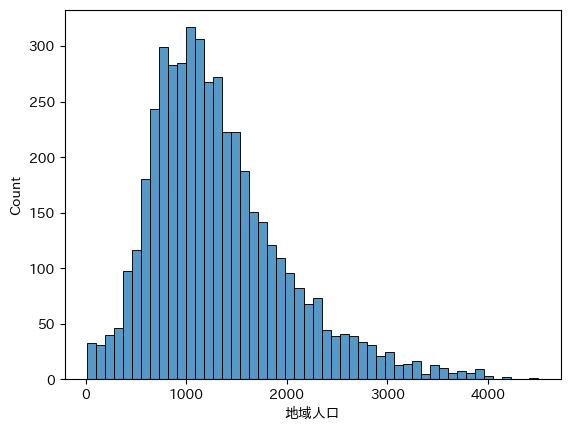

In [98]:
sns.histplot(x='地域人口', data=df_cluster5, bins=50)

<Axes: xlabel='経度', ylabel='緯度'>

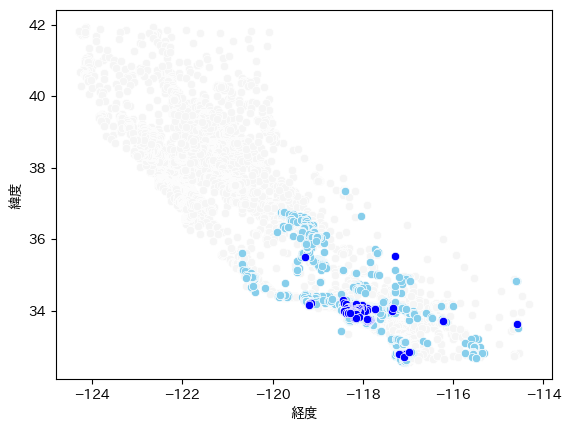

In [97]:
df_cluster5 = df.query('クラスター == 5')
sns.scatterplot(x='経度', y='緯度', data=df, color="whitesmoke")
sns.scatterplot(x='経度', y='緯度', data=df_cluster5.query('地域人口 <= 3000'), color="skyblue")
sns.scatterplot(x='経度', y='緯度', data=df_cluster5.query('地域人口 > 3000'), color="blue")
sns.scatterplot(x='経度', y='緯度', data=df_cluster5.query('地域人口 > 5000'), color="orange")

地域人口は5000名以下で、ボリュームゾーンは1000。カリフォルニアの下の方、かつ沿岸部周辺に集中する。

<Axes: xlabel='地域人口', ylabel='Count'>

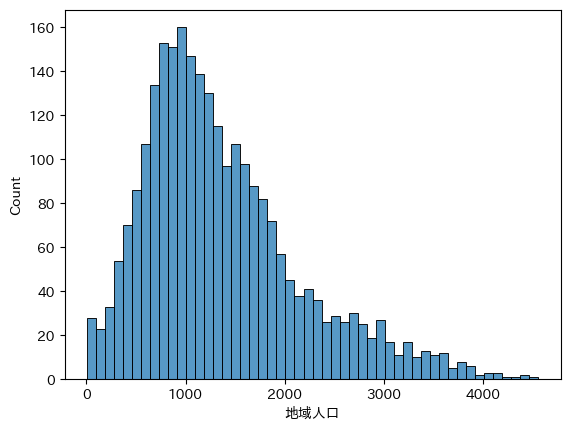

In [100]:
sns.histplot(x='地域人口', data=df_cluster6, bins=50)

<Axes: xlabel='経度', ylabel='緯度'>

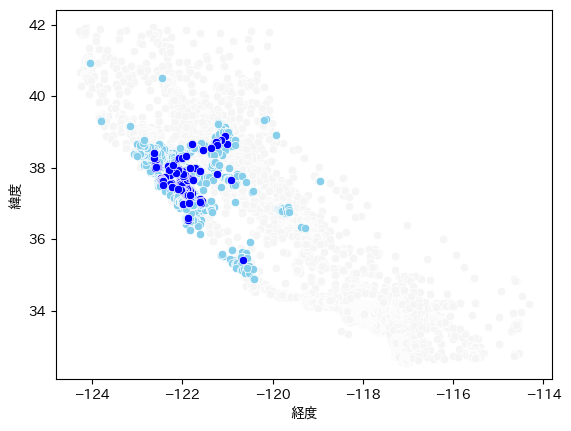

In [99]:
df_cluster6 = df.query('クラスター == 6')
sns.scatterplot(x='経度', y='緯度', data=df, color="whitesmoke")
sns.scatterplot(x='経度', y='緯度', data=df_cluster6.query('地域人口 <= 3000'), color="skyblue")
sns.scatterplot(x='経度', y='緯度', data=df_cluster6.query('地域人口 > 3000'), color="blue")
sns.scatterplot(x='経度', y='緯度', data=df_cluster5.query('地域人口 > 5000'), color="orange")

地域人口は5000名以下、ボリュームゾーンは1000名。カリフォルニアの上の方、サンフランシスコ周辺に人口が集中している。

<Axes: xlabel='地域人口', ylabel='Count'>

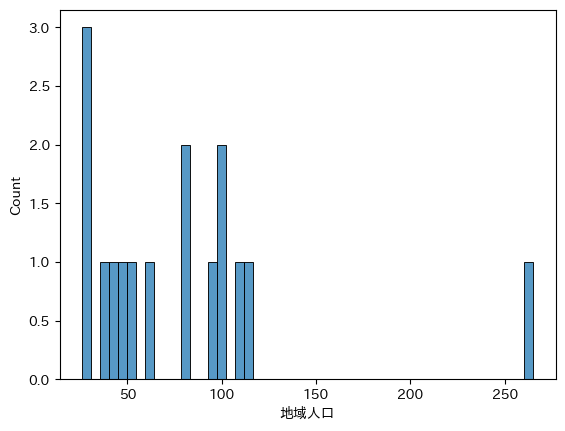

In [102]:
sns.histplot(x='地域人口', data=df_cluster7, bins=50)

<Axes: xlabel='経度', ylabel='緯度'>

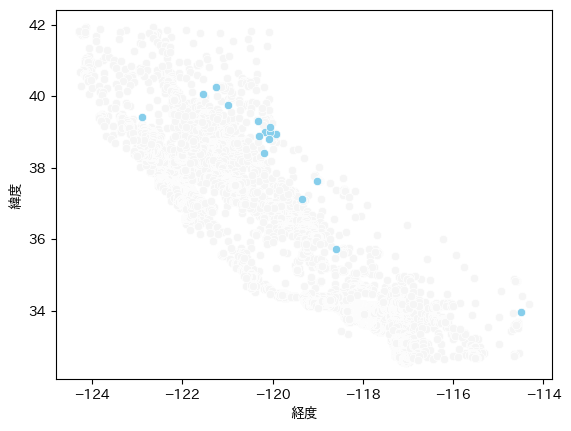

In [101]:
df_cluster7 = df.query('クラスター == 7')
sns.scatterplot(x='経度', y='緯度', data=df, color="whitesmoke")
sns.scatterplot(x='経度', y='緯度', data=df_cluster7.query('地域人口 <= 3000'), color="skyblue")
sns.scatterplot(x='経度', y='緯度', data=df_cluster7.query('地域人口 > 3000'), color="blue")
sns.scatterplot(x='経度', y='緯度', data=df_cluster7.query('地域人口 > 5000'), color="orange")

カリフォルニアの内陸部に点在している。

サンフランシスコにはクラスター０と３と６が集中しているようである。

<Axes: xlabel='経度', ylabel='緯度'>

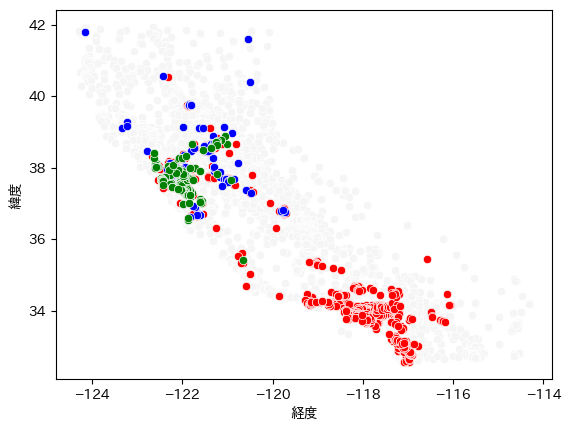

In [103]:
sns.scatterplot(x='経度', y='緯度', data=df, color="whitesmoke")
sns.scatterplot(x='経度', y='緯度', data=df_cluster0.query('地域人口 > 3000'), color="red")
sns.scatterplot(x='経度', y='緯度', data=df_cluster3.query('地域人口 > 3000'), color="blue")
sns.scatterplot(x='経度', y='緯度', data=df_cluster6.query('地域人口 > 3000'), color="green")

地域人口3000以上で絞った結果、クラスター０と３と６がサンフランシスコ周辺に人口が集中しているように見える。

クラスター０と３と６のクラスタリングした平均値のデータを再度見直してみる

In [104]:
cluster_mean = df.groupby('クラスター').mean()
cluster_mean

,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人
クラスター,,,,,,,,
0,4.006855,14.753404,5571.198185,35.022526,-118.921452,1.927101,1.733657,0.347552
1,3.305927,16.422001,1615.302670,33.963693,-117.792113,1.539820,1.891085,0.418073
2,5.529171,27.206442,1251.124451,33.867482,-118.127394,3.144966,2.229849,0.397016
3,2.784794,27.154195,1155.815398,38.183735,-121.502075,1.199911,1.921390,0.407700
4,3.638826,17.295775,560.619718,36.612535,-118.753028,1.601127,7.850414,1.620028
5,2.912084,36.294080,1323.809147,34.021921,-118.107016,1.566049,1.432466,0.329524
6,5.185207,26.006934,1367.884052,37.637716,-122.002042,2.857656,2.197256,0.393803
7,2.667063,19.000000,79.625000,38.467500,-119.951875,1.462312,25.975253,5.837735


サンフランシスコ周辺に所得の低い人が集まっているという考察が正しくないことが分かった。


収入の高い地域をクラスター０と６とし、低い地域をクラスター３としてマッピングして、サンフランシスコ周辺に的を絞って考察してみる。

サンフランシスコver高所得者と思われるクラスターの分布


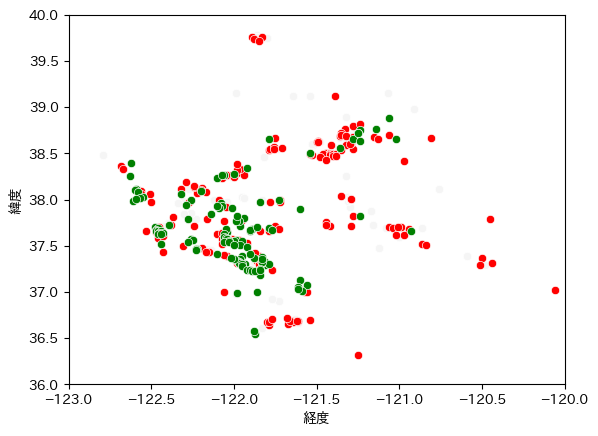

In [107]:
print('サンフランシスコver高所得者と思われるクラスターの分布')
import matplotlib.pyplot as plt

sns.scatterplot(x='経度', y='緯度', data=df_cluster3.query('地域人口 > 3000'), color="whitesmoke")
sns.scatterplot(x='経度', y='緯度', data=df_cluster0.query('地域人口 > 3000'), color="red")
sns.scatterplot(x='経度', y='緯度', data=df_cluster6.query('地域人口 > 3000'), color="green")

plt.xlim(-123, -120)
plt.ylim(36, 40)

plt.show()

サンフランシスコver低所得者と思われるクラスターの分布


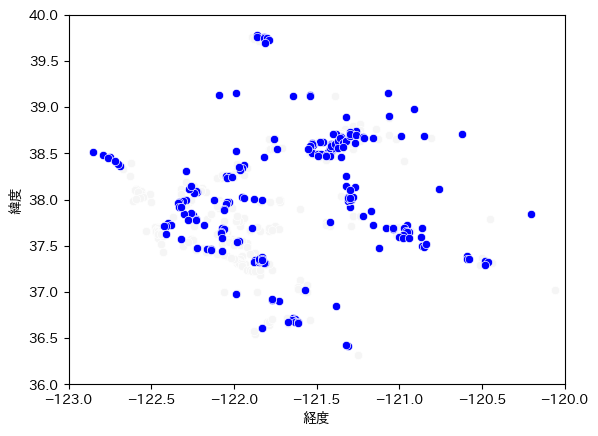

In [108]:
print('サンフランシスコver低所得者と思われるクラスターの分布')

sns.scatterplot(x='経度', y='緯度', data=df_cluster0.query('地域人口 > 3000'), color="whitesmoke")
sns.scatterplot(x='経度', y='緯度', data=df_cluster6.query('地域人口 > 3000'), color="whitesmoke")
sns.scatterplot(x='経度', y='緯度', data=df_cluster3.query('地域人口 > 2500'), color="blue")

plt.xlim(-123, -120)
plt.ylim(36, 40)

plt.show()

In [74]:
sanfrance_df = df.query('36 < 緯度 < 40 and -123 < 経度 < -120')
sanfrance_df.head()

,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人,クラスター
0,8.3252,41.0,322.0,37.88,-122.23,4.526,2.732919,0.400621,6
1,8.3014,21.0,2401.0,37.86,-122.22,3.585,2.956685,0.460641,6
2,2.0804,42.0,1206.0,37.84,-122.26,2.267,2.118574,0.551410,3
3,2.1250,50.0,697.0,37.85,-122.26,1.400,1.606887,0.406026,3
4,1.9911,50.0,990.0,37.84,-122.26,1.587,2.261616,0.459596,3


In [82]:
sanfrance_cluster3.sum()

所得       1.024131e+04
築年数      9.990100e+04
地域人口     4.249810e+06
緯度       1.370815e+05
経度      -4.372894e+05
住宅価格     4.643583e+03
部屋数/人    6.814331e+03
寝室数/人    1.456895e+03
クラスター    1.078800e+04
dtype: float64

サンフランシスコのクラスター３の地域人口は**約425万人**

In [81]:
sanfrance_cluster0 = sanfrance_df.query('クラスター == 0')
sanfrance_cluster6 = sanfrance_df.query('クラスター == 6')
sanfrance_cluster3 = sanfrance_df.query('クラスター == 3')

sanfrance_cluster0.sum()

所得          691.192300
築年数        2376.000000
地域人口     976040.000000
緯度         6404.170000
経度       -20571.860000
住宅価格        320.386000
部屋数/人       298.633788
寝室数/人        57.701368
クラスター         0.000000
dtype: float64

In [83]:
sanfrance_cluster6.sum()

所得       1.304404e+04
築年数      6.603900e+04
地域人口     3.452825e+06
緯度       9.472582e+04
経度      -3.068271e+05
住宅価格     7.228568e+03
部屋数/人    5.491963e+03
寝室数/人    9.871142e+02
クラスター    1.508400e+04
dtype: float64

サンフランシスコのクラスター０の地域人口は約98万人

サンフランシスコのクラスター６の地域人口は約345万人

クラスター０とクラスター６の合計地域人口は**約443万人**

低所得クラスターをクラスター０、高所得クラスターを３，６と仮定する。

低所得クラスター、高所得クラスターはサンフランシスコに広く分布する。

比較すると高所得クラスターの方が地域人口的に多い。

だがその中でも低所得クラスターが多く集中するエリアが緯度38.5,経度-121.5～-121.0に存在する。


**５．考察結果**

**課題**

カリフォルニアの住宅価格データをクラスタリングして、飲食店ビジネスに役立ちそうな知見を見いだす

**見解・意見**

１．サンフランシスコの低所得クラスターと高所得クラスターの比率はだいたい1:1で等分に近く分布も似通っている。

２．サンフランシスコで手軽手頃な飲食店を展開するならば、サンフランシスコの中でも低所得クラスターも多く集中している緯度38.5,経度-121.5～-121.0が良いだろう。